# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Attempting to process {len(cities)} cities.')

Attempting to process 602 cities.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
counter = 0
city_responses = []


for city in cities:
    api_url = f'{base_url}{city}&appid={weather_api_key}&units=imperial'
    
    try:
        response = requests.get(api_url).json()
        counter += 1
        cap_city = city.title()
        city_responses.append({'City': cap_city, 'Lat':response['coord']['lat'], 
                           'Lng':response['coord']['lon'],
                           'Max Temperature': response['main']['temp_max'],
                           'Humidity': response['main']['humidity'],
                           'Cloudiness': response['clouds']['all'],
                           'Windspeed': response['wind']['speed'],
                           'Country' : response['sys']['country'],
                           'Date': response['dt']
                          })
    
        print(f'Processing record {counter} for {cap_city}')
        
    except KeyError:
        print(f'Record {counter} for {cap_city} was not found.  Skipping...')


Record 1 for Nizhneyansk was not found.  Skipping...
Processing record 2 for Saskylakh
Processing record 3 for Mumford
Processing record 4 for Mahebourg
Record 5 for Sentyabrskiy was not found.  Skipping...
Processing record 6 for Harnosand
Processing record 7 for Kahului
Processing record 8 for Bhunya
Processing record 9 for Krasnoselkup
Processing record 10 for Kodinsk
Processing record 11 for Yumen
Processing record 12 for East London
Processing record 13 for Hermanus
Record 14 for Taolanaro was not found.  Skipping...
Processing record 15 for Arraial Do Cabo
Processing record 16 for Vestmannaeyjar
Record 17 for Vaitupu was not found.  Skipping...
Processing record 18 for Maryville
Processing record 19 for Ushuaia
Processing record 20 for Albany
Processing record 21 for Kapaa
Processing record 22 for Ostrovnoy
Processing record 23 for Provideniya
Processing record 24 for Barrow
Processing record 25 for Kaitangata
Processing record 26 for Baracoa
Processing record 27 for Mataura
Proc

Processing record 223 for Port Macquarie
Processing record 224 for Atar
Processing record 225 for Manaure
Processing record 226 for Ponta Delgada
Processing record 227 for Thompson
Processing record 228 for Kavieng
Processing record 229 for Agdam
Processing record 230 for Kathmandu
Record 231 for Linchuan was not found.  Skipping...
Processing record 232 for Hualmay
Processing record 233 for Gorlice
Processing record 234 for Genhe
Processing record 235 for Dingle
Processing record 236 for Margate
Processing record 237 for Ereymentau
Processing record 238 for Norman Wells
Processing record 239 for Saint George
Processing record 240 for Airai
Processing record 241 for Victoria
Processing record 242 for Floriano
Processing record 243 for Moramanga
Processing record 244 for Alice Springs
Processing record 245 for Taoudenni
Processing record 246 for Tilichiki
Processing record 247 for Kirakira
Processing record 248 for Ahuimanu
Processing record 249 for Tura
Processing record 250 for Tokoro

Processing record 449 for Raisio
Processing record 450 for Naze
Processing record 451 for Somerville
Processing record 452 for Slave Lake
Processing record 453 for Itoigawa
Processing record 454 for Batagay
Processing record 455 for Kloulklubed
Processing record 456 for Kamenka
Processing record 457 for Antalaha
Record 458 for Umm Ruwabah was not found.  Skipping...
Processing record 459 for Pevek
Processing record 460 for Saint-Pierre
Processing record 461 for North Bend
Processing record 462 for Vanimo
Processing record 463 for Inirida
Processing record 464 for Znamenskoye
Processing record 465 for Pekan
Processing record 466 for Chilca
Processing record 467 for Graaff-Reinet
Processing record 468 for Ayia Galini
Record 469 for Umzimvubu was not found.  Skipping...
Processing record 470 for Hamilton
Processing record 471 for Mianyang
Processing record 472 for Aksarka
Processing record 473 for Port Moresby
Processing record 474 for Vao
Processing record 475 for Rorvik
Processing recor

In [4]:
city_df = pd.DataFrame(city_responses)
city_df.head()

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Saskylakh,71.92,114.08,62.24,44,100,11.92,RU,1595313119
1,Mumford,5.26,-0.76,75.04,92,95,5.68,GH,1595313119
2,Mahebourg,-20.41,57.70,71.60,53,75,17.22,MU,1595313120
3,Harnosand,62.63,17.94,55.99,81,100,12.75,SE,1595313120
4,Kahului,20.89,-156.47,80.60,61,20,11.41,US,1595312984


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df.count()
city_df.to_csv('../output_data/city_data.csv', index=True) 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_df.sort_values(['Humidity'], ascending = False)
#There are no cities with humidity > 100

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Windspeed,Country,Date
354,Port Hawkesbury,45.62,-61.35,68.00,100,1,6.93,CA,1595313183
294,Clyde River,70.47,-68.59,42.80,100,90,9.17,CA,1595313173
304,Dauphin,51.15,-100.05,55.40,100,1,2.24,CA,1595313174
369,Matagami,49.75,-77.63,51.80,100,20,5.19,CA,1595312946
160,Vila Velha,-20.33,-40.29,66.20,100,75,3.36,BR,1595313149
...,...,...,...,...,...,...,...,...,...
432,Zhanaozen,43.30,52.80,102.25,13,44,21.70,KZ,1595313197
496,Kununurra,-15.77,128.73,86.00,13,0,8.05,AU,1595313207
486,Nurota,40.56,65.69,98.60,12,0,6.93,UZ,1595313205
455,Katherine,-14.47,132.27,86.00,9,100,9.17,AU,1595313200


In [7]:
city_df.describe()
#again no cities with humidity > 100

,Lat,Lng,Max Temperature,Humidity,Cloudiness,Windspeed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,20.599945,22.106277,70.374398,69.505474,53.313869,7.975164,1.595313e+09
std,33.458361,91.458655,13.363005,21.235985,39.988527,5.062608,6.130016e+01
min,-54.800000,-179.170000,26.010000,3.000000,0.000000,0.310000,1.595313e+09
25%,-8.440000,-58.980000,60.800000,56.000000,4.000000,4.175000,1.595313e+09
50%,25.525000,26.110000,71.590000,74.000000,71.000000,6.930000,1.595313e+09
75%,49.315000,104.805000,80.600000,87.000000,92.000000,10.577500,1.595313e+09
max,78.220000,179.320000,102.990000,100.000000,100.000000,25.790000,1.595313e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [8]:
#function will draw scatter plots for all remaining cells.

def scatterDraw(yValue, yValueUnit, graphColor, dataframe, titleValue):
    plt.figure(figsize=(9, 5))
    plt.scatter(dataframe['Lat'], dataframe[yValue], marker = 'o', 
                color = graphColor, alpha = 0.5, edgecolors = 'grey')
    plt.xlabel('Latitude')
    plt.ylabel(f'{yValue} ({yValueUnit})')
    plt.title(f'{titleValue} Latitude vs. {yValue} ({yValueUnit}) ({date.today()})')
    plt.grid()
    
    saveFig(yValue, yValueUnit, titleValue)


In [9]:
#function will draw regression lines for all scatter plots.
#takes 4 params for line itself and also where to place the line on the graph.

def regressionLine(x,y, text_place_x, text_place_y):

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    print("R-squared: %f" % r_value**2)
    plt.plot(x, intercept + slope*x, 'r', label='regression line')
    plt.text(text_place_x, text_place_y, f'y = {round(slope,3)}x + {round(intercept,3)}', color = 'red', fontsize = 12)
    plt.legend()

In [10]:
def saveFig(yValue, yValueUnit, titleValue):
    figpath = f'../output_data/{titleValue} Latitude vs. {yValue} ({yValueUnit}).png'

    plt.savefig(figpath)

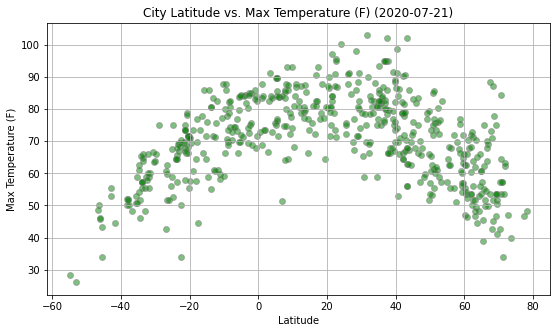

In [11]:
plot = scatterDraw('Max Temperature', 'F', 'green', city_df, 'City')
plt.show()

## Latitude vs. Humidity Plot

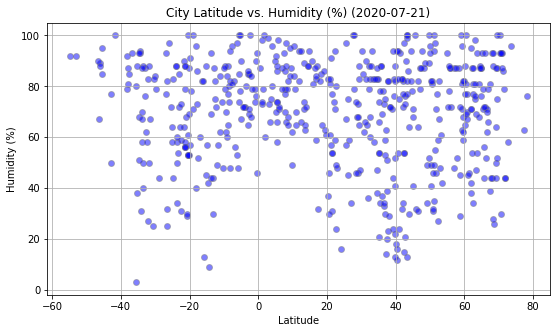

In [12]:
plot = scatterDraw('Humidity', '%', 'blue', city_df, 'City')
plt.show()

## Latitude vs. Cloudiness Plot

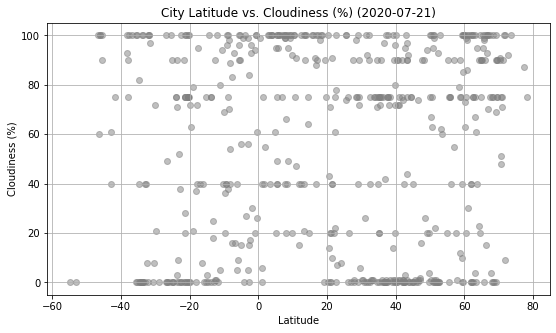

In [13]:
plot = scatterDraw('Cloudiness', '%', 'grey', city_df, 'City')
plt.show()

## Latitude vs. Wind Speed Plot

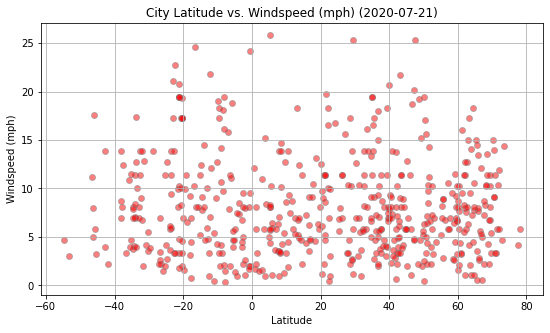

In [14]:
plot = scatterDraw('Windspeed', 'mph', 'red', city_df, 'City')
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df.loc[city_df['Lat'] >= 0]
northern_df = northern_df.copy()

southern_df = city_df.loc[city_df['Lat'] <= 0]
southern_df = southern_df.copy()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.393716


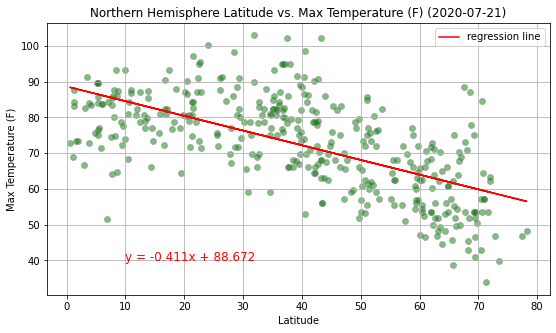

In [16]:
#Each cell will draw scatter, regression line and save by calling functions with the appropriate params.
#must call the saveFig last to overwrite initial save to add regression line.

plot = scatterDraw('Max Temperature', 'F', 'green', northern_df, 'Northern Hemisphere')
regress = regressionLine(northern_df['Lat'], northern_df['Max Temperature'], 10, 40)
saveFig('Max Temperature', 'F', 'Northern Hemisphere')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.597039


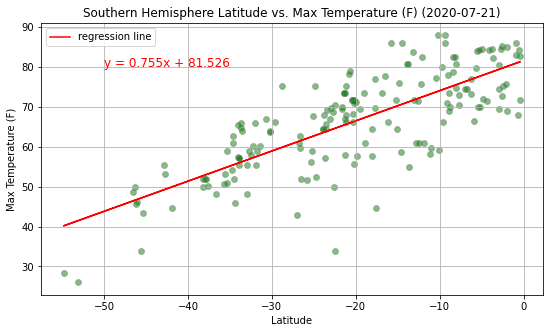

In [17]:
plot = scatterDraw('Max Temperature', 'F', 'green', southern_df, 'Southern Hemisphere')
regress = regressionLine(southern_df['Lat'], southern_df['Max Temperature'], -50, 80)
saveFig('Max Temperature', 'F', 'Southern Hemisphere')

plt.show()

# Observation
There appears to be a significant correlation between latitute and max temperature.  This makes sense since the closer to the equator the warmer the max temps are.  However, the correlations seems stronger for the southern hemisphere which is in wintertime right now.  This could be due to a smaller sample size and relative locations in the smaller sample size.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.006719


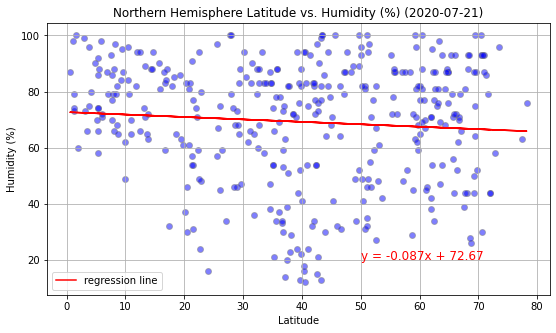

In [18]:
plot = scatterDraw('Humidity', '%', 'blue', northern_df, 'Northern Hemisphere')
regress = regressionLine(northern_df['Lat'], northern_df['Humidity'], 50, 20)
saveFig('Humidity', '%', 'Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.000225


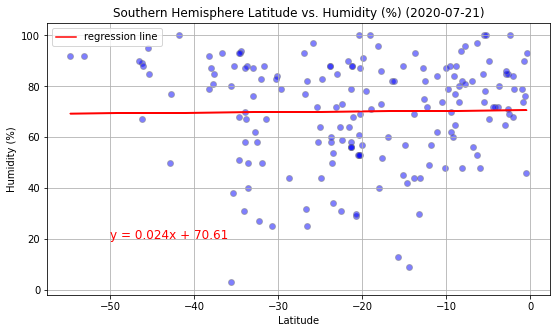

In [19]:
plot = scatterDraw('Humidity', '%', 'blue', southern_df, 'Southern Hemisphere')
regress = regressionLine(southern_df['Lat'], southern_df['Humidity'], -50, 20)
saveFig('Humidity', '%', 'Southern Hemisphere')
plt.show()

# Observation
While there is generally a weak correlation of Humidity and latitude, what is surprising is the relative humidity is clustered around 70% for most of the earth.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.000826


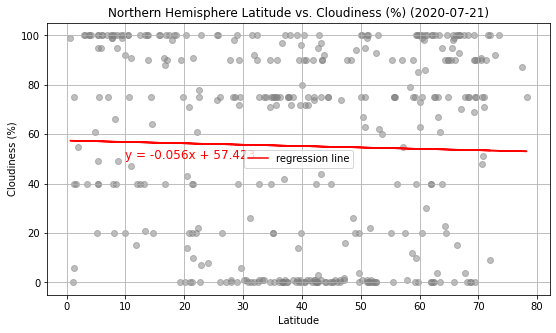

In [20]:
plot = scatterDraw('Cloudiness', '%', 'grey', northern_df, 'Northern Hemisphere')
regress = regressionLine(northern_df['Lat'], northern_df['Cloudiness'], 10, 50)
saveFig('Cloudiness', '%', 'Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.001707


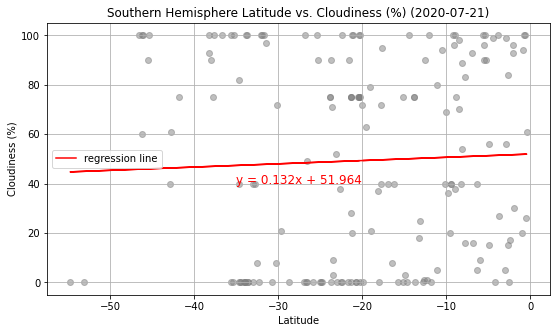

In [21]:
plot = scatterDraw('Cloudiness', '%', 'grey', southern_df, 'Southern Hemisphere')
regress = regressionLine(southern_df['Lat'], southern_df['Cloudiness'], -35, 40)
saveFig('Cloudiness', '%', 'Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.000490


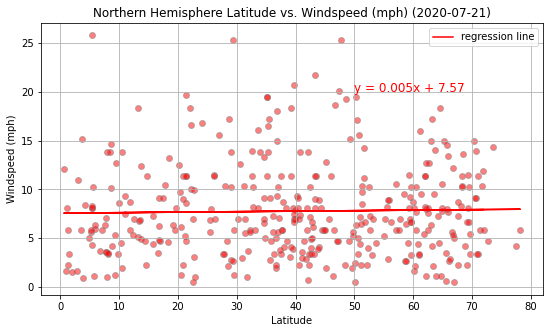

In [22]:
plot = scatterDraw('Windspeed', 'mph', 'red', northern_df, 'Northern Hemisphere')
regress = regressionLine(northern_df['Lat'], northern_df['Windspeed'], 50, 20)
saveFig('Windspeed', 'mph', 'Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.000138


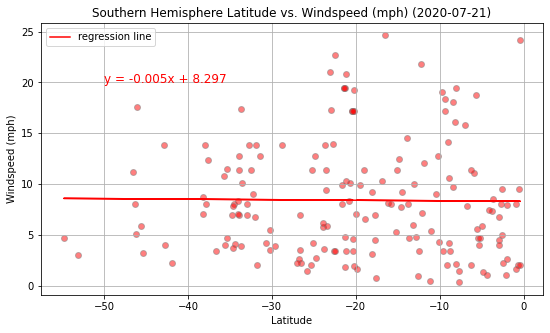

In [23]:
plot = scatterDraw('Windspeed', 'mph', 'red', southern_df, 'Southern Hemisphere')
regress = regressionLine(southern_df['Lat'], southern_df['Windspeed'], -50, 20)
saveFig('Windspeed', 'mph', 'Southern Hemisphere')
plt.show()

# Observation
There are very week correlations between windspeed and cloudiness and latitude.  But the cloudiness data seems to cluster around the extremes.  If the hemispheres were broken in half again, there may be an interesting trend particularly in the northern hemisphere.